# MTN Nigeria Churn Analysis and Predictive Modeling

**Objectif :** Analyser le comportement des clients et identifier les facteurs contribuant au churn (attrition) pour MTN Nigeria afin d'améliorer les stratégies de rétention. Ce notebook inclut également la construction et l'évaluation de plusieurs modèles prédictifs de churn.

## 1. Importation des Bibliothèques Nécessaires

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## 2. Chargement et Exploration Initiale des Données

In [3]:
# Chemin d'accès direct au fichier CSV
# Option 1: Relative path (best if notebook and CSV are in the same folder 'pv1')
csv_file_path = 'mtn_customer_churn.csv'

# Option 2: Full absolute path (use if the notebook might be run from elsewhere,
# or if the CSV is in a fixed, different location)
# csv_file_path = 'C:/Users/HP/Downloads/pv1/mtn_customer_churn.csv'
# Note: Use forward slashes '/' or escaped backslashes '\\' in Python strings for paths.

# Vérifier si le fichier existe
if not os.path.exists(csv_file_path):
    print(f"ERREUR: Le fichier CSV n'a pas été trouvé à '{csv_file_path}'.")
    print(f"Veuillez vérifier que le fichier existe à cet emplacement ou que le chemin est correct.")
    # Vous pouvez lever une exception ici si le fichier est indispensable
    raise FileNotFoundError(f"Le fichier CSV '{csv_file_path}' n'a pas pu être localisé.")
else:
    print(f"Chargement des données depuis: {csv_file_path}")
    try:
        df = pd.read_csv(csv_file_path)
        print("Données chargées avec succès dans le DataFrame 'df'.")
        # print(df.head()) # Pour afficher les premières lignes du DataFrame
    except Exception as e:
        print(f"Une erreur est survenue lors de la lecture du fichier CSV : {e}")
        # Gérer l'exception comme il se doit

Chargement des données depuis: mtn_customer_churn.csv
Données chargées avec succès dans le DataFrame 'df'.


In [4]:
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [5]:
df.tail()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
969,CUST0498,Shehu Harris,Jan-25,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,No,NaN
970,CUST0499,Tega Hood,Mar-25,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,No,NaN
971,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,Yes,High Call Tarriffs
972,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,Yes,High Call Tarriffs
973,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Broadband MiFi,Male,4,Very Good,31,150GB FUP Monthly Unlimited,20000,14,280000,86.04,Yes,High Call Tarriffs


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

**Observations initiales :**
*   Le dataset contient 974 entrées et 17 colonnes.
*   La colonne `Reasons for Churn` a des valeurs manquantes (690 NaN). C'est attendu car cette colonne n'est renseignée que pour les clients ayant churné.
*   Les autres colonnes ne présentent pas de valeurs manquantes.
*   Plusieurs colonnes sont de type 'object' et devront être traitées pour la modélisation (ex: `Date of Purchase`, `State`, `MTN Device`, `Gender`, `Customer Review`, `Subscription Plan`).

In [7]:
df.describe(include='all')

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
count,974,974,974,974.000000,974,974,974,974.000000,974,974.000000,974,974.000000,974.000000,9.740000e+02,974.000000,974,284
unique,496,484,3,NaN,35,4,2,NaN,5,NaN,21,NaN,NaN,NaN,NaN,2,7
top,CUST0003,Halima Walker,Feb-25,NaN,Osun,Mobile SIM Card,Female,NaN,Very Good,NaN,60GB Monthly Broadband Plan,NaN,NaN,NaN,NaN,No,High Call Tarriffs
freq,3,5,450,NaN,43,301,495,NaN,212,NaN,81,NaN,NaN,NaN,NaN,690,54
mean,NaN,NaN,NaN,48.043121,NaN,NaN,NaN,2.947639,NaN,31.422998,NaN,19196.663244,10.564682,2.046696e+05,99.304764,NaN,NaN
std,NaN,NaN,NaN,17.764307,NaN,NaN,NaN,1.384219,NaN,17.191256,NaN,25586.726985,5.709427,3.247855e+05,57.739511,NaN,NaN
min,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,350.000000,1.000000,3.500000e+02,0.820000,NaN,NaN
25%,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,2.000000,NaN,17.000000,NaN,5500.000000,5.000000,3.300000e+04,47.637500,NaN,NaN
50%,NaN,NaN,NaN,49.000000,NaN,NaN,NaN,3.000000,NaN,31.000000,NaN,14500.000000,11.000000,1.080000e+05,103.330000,NaN,NaN
75%,NaN,NaN,NaN,63.750000,NaN,NaN,NaN,4.000000,NaN,47.000000,NaN,24000.000000,15.000000,2.610000e+05,149.697500,NaN,NaN


**Statistiques Descriptives :**
*   **Age :** Varie de 16 à 80 ans, avec une moyenne de 48 ans.
*   **Satisfaction Rate :** De 1 à 5, moyenne de 2.95. La colonne `Customer Review` semble être la version textuelle de `Satisfaction Rate`.
*   **Customer Tenure in months :** Ancienneté du client, de 1 à 60 mois, moyenne de 31 mois.
*   **Unit Price, Number of Times Purchased, Total Revenue, Data Usage :** Variables numériques avec des distributions variées qui seront explorées plus en détail.

In [8]:
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

Valeurs manquantes par colonne :
 Customer ID                    0
Full Name                      0
Date of Purchase               0
Age                            0
State                          0
MTN Device                     0
Gender                         0
Satisfaction Rate              0
Customer Review                0
Customer Tenure in months      0
Subscription Plan              0
Unit Price                     0
Number of Times Purchased      0
Total Revenue                  0
Data Usage                     0
Customer Churn Status          0
Reasons for Churn            690
dtype: int64


In [9]:
print("\nNombre de lignes dupliquées :", df.duplicated().sum())


Nombre de lignes dupliquées : 0


Le dataset ne contient pas de lignes dupliquées.

In [10]:
print("\nTypes de données par colonne :\n", df.dtypes)


Types de données par colonne :
 Customer ID                   object
Full Name                     object
Date of Purchase              object
Age                            int64
State                         object
MTN Device                    object
Gender                        object
Satisfaction Rate              int64
Customer Review               object
Customer Tenure in months      int64
Subscription Plan             object
Unit Price                     int64
Number of Times Purchased      int64
Total Revenue                  int64
Data Usage                   float64
Customer Churn Status         object
Reasons for Churn             object
dtype: object


In [11]:
print("\nDimensions du DataFrame :", df.shape)


Dimensions du DataFrame : (974, 17)


In [12]:
print("\nColonnes du DataFrame :\n", df.columns.tolist())


Colonnes du DataFrame :
 ['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State', 'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review', 'Customer Tenure in months', 'Subscription Plan', 'Unit Price', 'Number of Times Purchased', 'Total Revenue', 'Data Usage', 'Customer Churn Status', 'Reasons for Churn']


## 3. Nettoyage des Données et Feature Engineering

OK, petit point sur les colonnes : Reasons for Churn, c'est cool pour piger pourquoi les gens se barrent, mais pour prédire s'ils vont se barrer, ça ne sert à rien (vu qu'on le sait qu'après coup). Donc, hop, pour l'EDA, mais pas pour le modèle.
Et Customer Review, c'est juste Satisfaction Rate mais avec des mots. Donc, pour le modèle, je prends Satisfaction Rate, c'est plus simple.

In [13]:
# Feature Engineering: Création de 'Revenue_per_Month'
# Gérer les cas où Customer Tenure in months pourrait être 0 pour éviter la division par zéro
df['Revenue_per_Month'] = df.apply(lambda row: row['Total Revenue'] / row['Customer Tenure in months'] if row['Customer Tenure in months'] > 0 else 0, axis=1)

df[['Total Revenue', 'Customer Tenure in months', 'Revenue_per_Month']].head()

,Total Revenue,Customer Tenure in months,Revenue_per_Month
0,665000,2,332500.000000
1,66000,22,3000.000000
2,160000,60,2666.666667
3,4000,60,66.666667
4,135000,60,2250.000000


## 4. Analyse Exploratoire des Données (EDA) & Visualisations

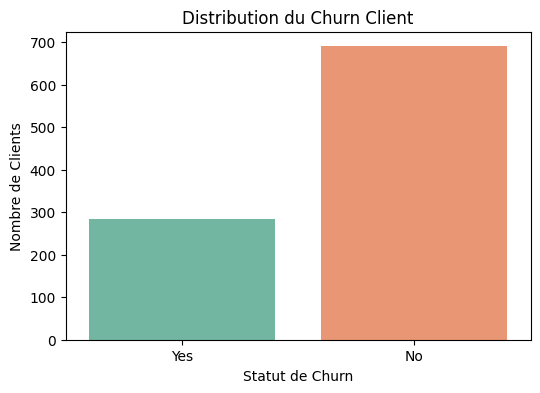

Customer Churn Status
No     0.708419
Yes    0.291581
Name: proportion, dtype: float64


In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Churn Status', data=df, palette='Set2')
plt.title('Distribution du Churn Client')
plt.xlabel('Statut de Churn')
plt.ylabel('Nombre de Clients')
plt.savefig('churn_distribution.png') # Sauvegarde pour l'app web
plt.show()

print(df['Customer Churn Status'].value_counts(normalize=True))

**Distribution du Churn :**
*   Environ 70.8% des clients n'ont pas churné ('No').
*   Environ 29.2% des clients ont churné ('Yes').
C'est un dataset modérément déséquilibré, ce qui devra être pris en compte lors de l'évaluation des modèles.

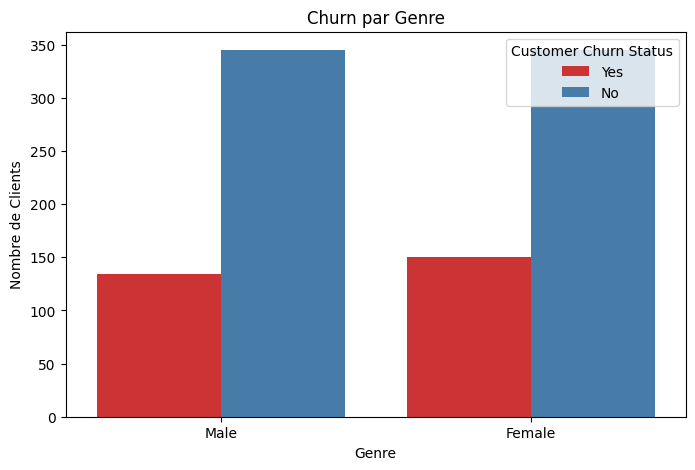

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Customer Churn Status', data=df, palette='Set1')
plt.title('Churn par Genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de Clients')
plt.show()

Le taux de churn semble similaire entre les genres, bien qu'il y ait légèrement plus d'hommes que de femmes dans le dataset.

<Figure size 1200x700 with 0 Axes>

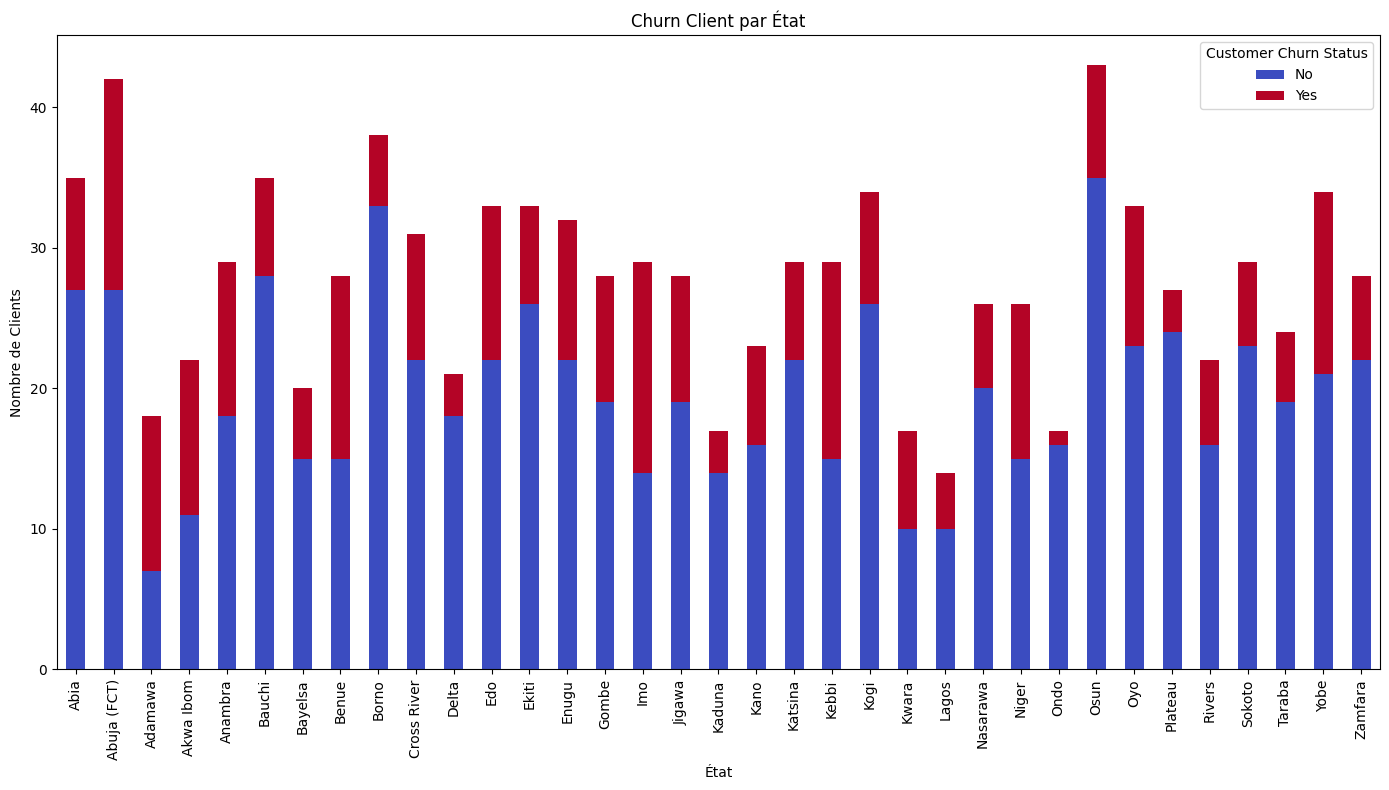

In [16]:
plt.figure(figsize=(12,7))
churn_by_state = df.groupby(['State', 'Customer Churn Status']).size().unstack(fill_value=0)
churn_by_state.plot(kind='bar', stacked=True, figsize=(14,8), colormap='coolwarm')
plt.title('Churn Client par État')
plt.ylabel('Nombre de Clients')
plt.xlabel('État')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('churn_by_state.png') # Sauvegarde pour l'app web
plt.show()

Certains états semblent avoir un nombre absolu plus élevé de churners, mais cela peut être dû à une plus grande base de clients dans ces états. Une analyse en pourcentage serait utile pour comparer les taux de churn.

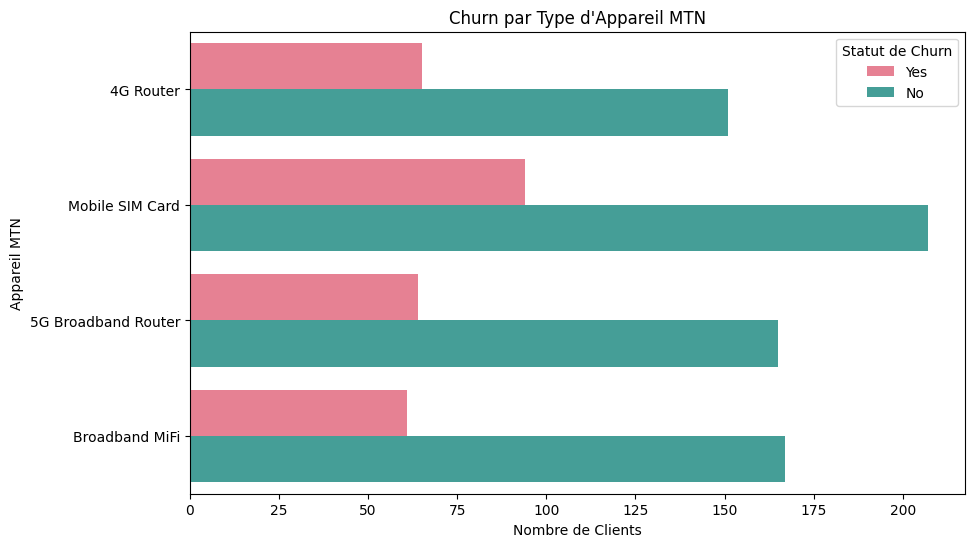

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y='MTN Device', hue='Customer Churn Status', data=df, palette='husl')
plt.title('Churn par Type d\'Appareil MTN')
plt.xlabel('Nombre de Clients')
plt.ylabel('Appareil MTN')
plt.legend(title='Statut de Churn')
plt.show()

Les clients utilisant des cartes SIM mobiles semblent être plus nombreux à churner, mais ils sont aussi les plus nombreux en général. Les proportions relatives de churn par type d'appareil seraient intéressantes.

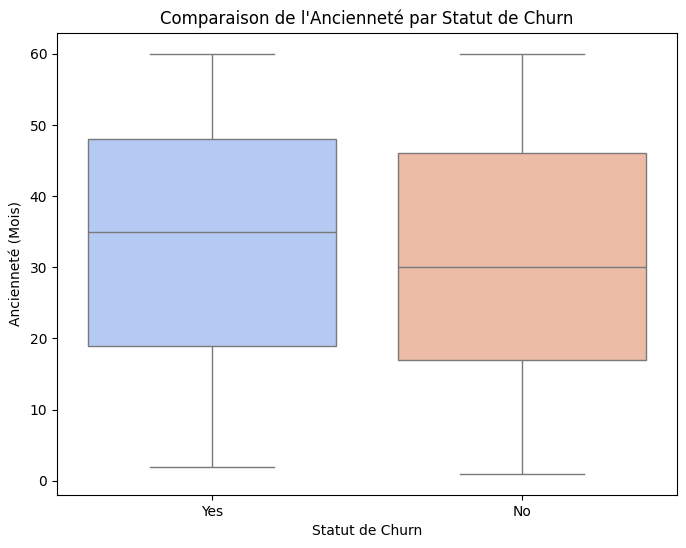

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Customer Churn Status', y='Customer Tenure in months', data=df, palette='coolwarm')
plt.title('Comparaison de l\'Ancienneté par Statut de Churn')
plt.ylabel('Ancienneté (Mois)')
plt.xlabel('Statut de Churn')
plt.show()

Les clients qui ont churné ont tendance à avoir une ancienneté (tenure) plus faible que ceux qui n'ont pas churné. La médiane de l'ancienneté pour les non-churners est plus élevée.

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Total Revenue', hue='Customer Churn Status', kde=True, palette='Set2', multiple='stack')
plt.title('Distribution du Revenu Total par Statut de Churn')
plt.xlabel('Revenu Total')
plt.ylabel('Nombre de Clients')
plt.show()

La distribution du revenu total montre que les clients générant moins de revenus ont tendance à churner davantage, bien que le churn existe à tous les niveaux de revenu.

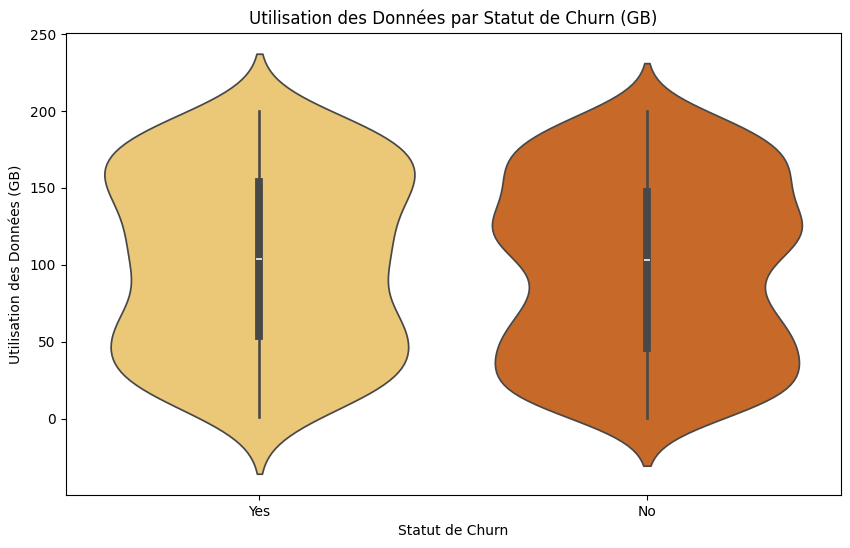

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Customer Churn Status', y='Data Usage', data=df, palette='YlOrBr')
plt.title('Utilisation des Données par Statut de Churn (GB)')
plt.ylabel('Utilisation des Données (GB)')
plt.xlabel('Statut de Churn')
plt.show()

L'utilisation des données semble assez similaire entre les churners et les non-churners, bien que la distribution pour les non-churners soit légèrement plus étalée vers des utilisations plus élevées.

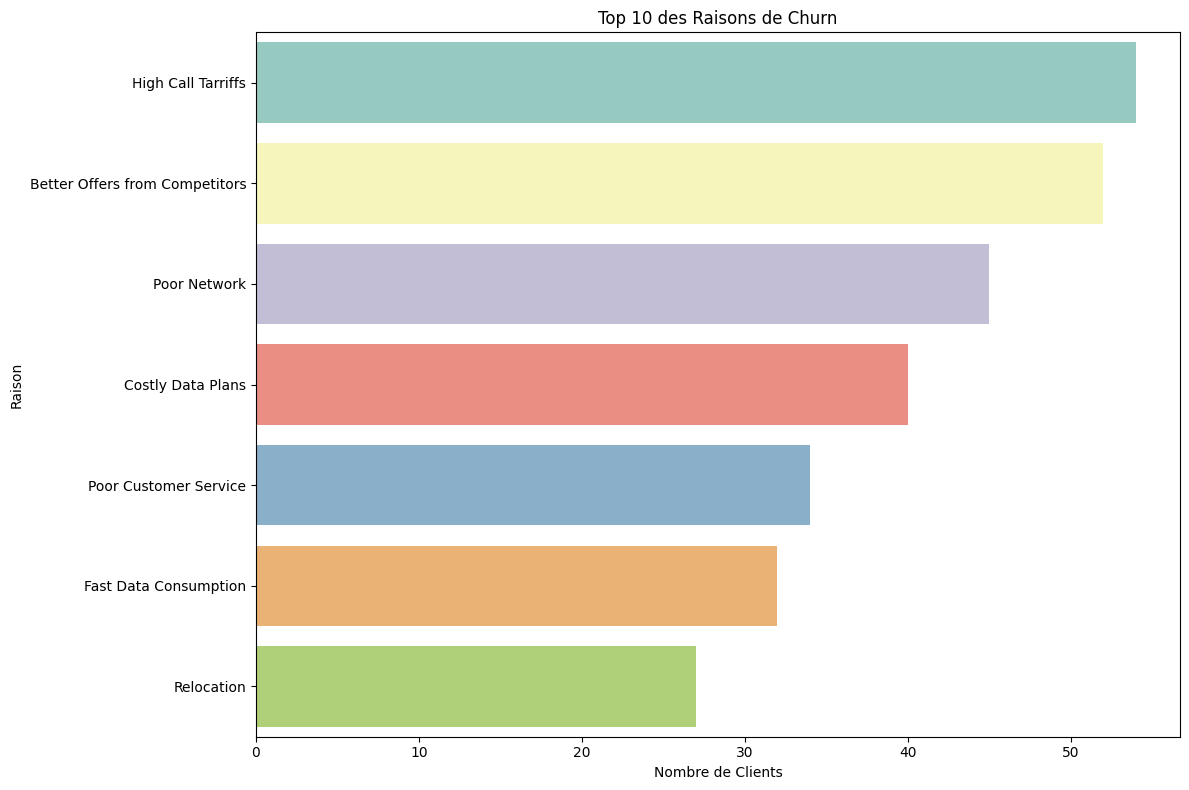

In [20]:
plt.figure(figsize=(12,8))
top_reasons = df['Reasons for Churn'].value_counts().head(10)
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='Set3')
plt.title('Top 10 des Raisons de Churn')
plt.xlabel('Nombre de Clients')
plt.ylabel('Raison')
plt.tight_layout()
plt.savefig('top_churn_reasons.png') # Sauvegarde pour l'app web
plt.show()

Les principales raisons de churn incluent les tarifs d'appel élevés, les offres concurrentes plus intéressantes, et la consommation rapide des données.

<Figure size 1200x1000 with 0 Axes>

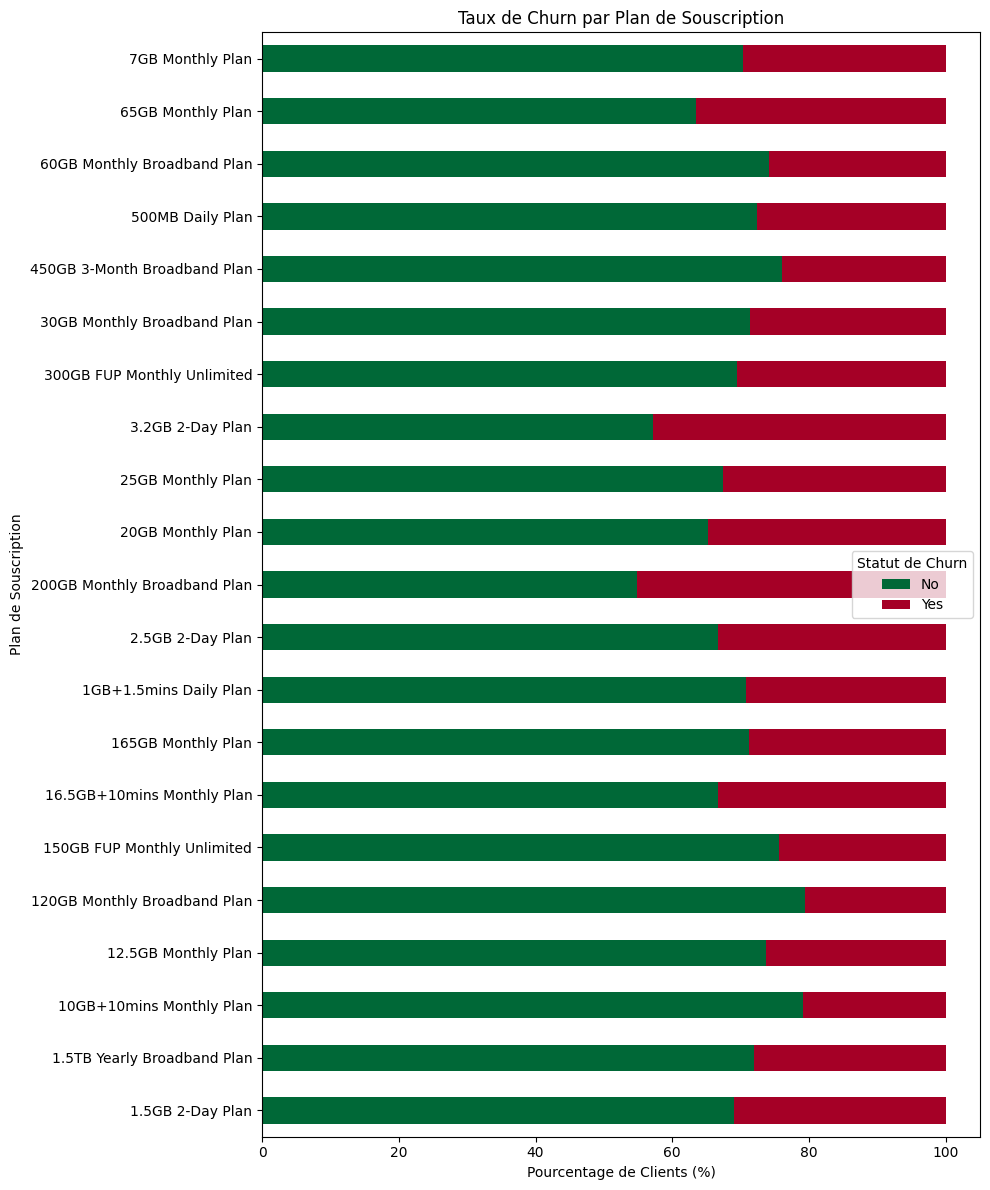

In [21]:
plt.figure(figsize=(12,10))
churn_rate_by_plan = df.groupby('Subscription Plan')['Customer Churn Status'].value_counts(normalize=True).mul(100).unstack().fillna(0)
churn_rate_by_plan.plot(kind='barh', stacked=True, figsize=(10,12), colormap='RdYlGn_r')
plt.title('Taux de Churn par Plan de Souscription')
plt.xlabel('Pourcentage de Clients (%)')
plt.ylabel('Plan de Souscription')
plt.legend(title='Statut de Churn')
plt.tight_layout()
plt.show()

Cette visualisation montre le pourcentage de churners et de non-churners pour chaque plan. Certains plans pourraient avoir un taux de churn proportionnellement plus élevé.

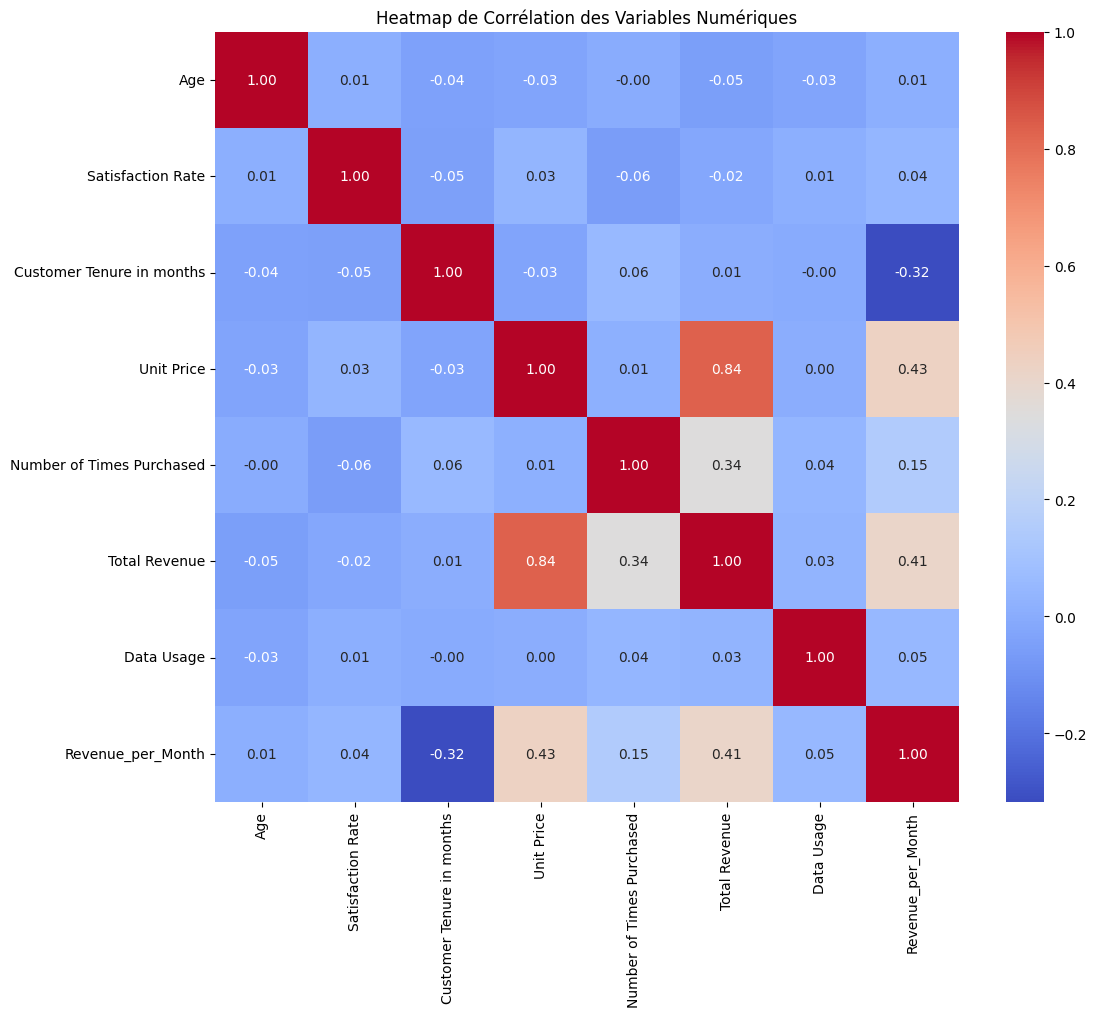

In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de Corrélation des Variables Numériques")
plt.show()

La heatmap de corrélation montre :
*   Une forte corrélation positive entre `Total Revenue` et `Unit Price`, ainsi qu'entre `Total Revenue` et `Number of Times Purchased` (ce qui est logique).
*   `Revenue_per_Month` est corrélé avec `Unit Price`.
*   Il n'y a pas de corrélations extrêmement fortes entre les autres features, ce qui est bon pour éviter la multicolinéarité dans les modèles.

## 5. Préparation des Données pour la Modélisation

In [23]:
# Définir la colonne cible
target_col = 'Customer Churn Status'

# Colonnes à retirer pour la modélisation (non prédictives ou trop liées à la cible a posteriori)
cols_to_drop_model = [target_col, 'Date of Purchase', 'Customer ID', 'Full Name', 'Customer Review', 'Reasons for Churn']
existing_drop_cols_model = [col for col in cols_to_drop_model if col in df.columns]
predictor_cols_model = [col for col in df.columns if col not in existing_drop_cols_model]

# Créer le DataFrame pour le modèle avec les features sélectionnées
df_for_model = df[predictor_cols_model].copy()

# Encodage One-hot des variables catégorielles restantes dans les prédicteurs
df_model_encoded = pd.get_dummies(df_for_model, drop_first=True)

X = df_model_encoded.copy()

# Créer la variable cible (y) en encodant 'Yes'/'No' en 1/0
if target_col in df.columns:
    y = df[target_col].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() in ['yes'] else 0)
else:
    raise ValueError(f'La colonne cible {target_col} n\'existe pas dans le DataFrame.')

print('Forme de la matrice des features (X) :', X.shape)
print('Forme du vecteur cible (y) :', y.shape)

if X.shape[0] == 0:
    raise ValueError('La matrice des features est vide. Vérifiez les étapes de nettoyage.')

# Division Stratifiée en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print('\nForme de X_train :', X_train.shape)
print('Forme de X_test :', X_test.shape)

# Scaling des features numériques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir les arrays NumPy en DataFrames pour conserver les noms de colonnes (optionnel mais bon pour la lisibilité)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nDistribution des classes dans le dataset complet :\n", y.value_counts(normalize=True))
print("Distribution des classes dans l'ensemble d'entraînement :\n", y_train.value_counts(normalize=True))
print("Distribution des classes dans l'ensemble de test :\n", y_test.value_counts(normalize=True))

Forme de la matrice des features (X) : (974, 66)
Forme du vecteur cible (y) : (974,)

Forme de X_train : (681, 66)
Forme de X_test : (293, 66)

Distribution des classes dans le dataset complet :
 Customer Churn Status
0    0.708419
1    0.291581
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble d'entraînement :
 Customer Churn Status
0    0.707783
1    0.292217
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble de test :
 Customer Churn Status
0    0.709898
1    0.290102
Name: proportion, dtype: float64


La stratification a bien fonctionné, les proportions des classes sont similaires dans les ensembles d'entraînement et de test.

## 6. Modélisation Prédictive


--- Entraînement et Évaluation du modèle : Logistic Regression ---
Accuracy : 0.6655
Rapport de Classification :
               precision    recall  f1-score   support

    No Churn       0.71      0.88      0.79       208
       Churn       0.31      0.13      0.18        85

    accuracy                           0.67       293
   macro avg       0.51      0.51      0.49       293
weighted avg       0.60      0.67      0.61       293



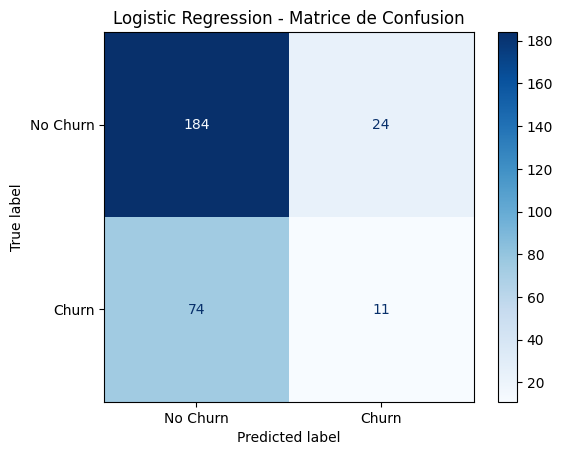


--- Entraînement et Évaluation du modèle : Random Forest ---
Accuracy : 0.7031
Rapport de Classification :
               precision    recall  f1-score   support

    No Churn       0.72      0.97      0.82       208
       Churn       0.42      0.06      0.10        85

    accuracy                           0.70       293
   macro avg       0.57      0.51      0.46       293
weighted avg       0.63      0.70      0.61       293



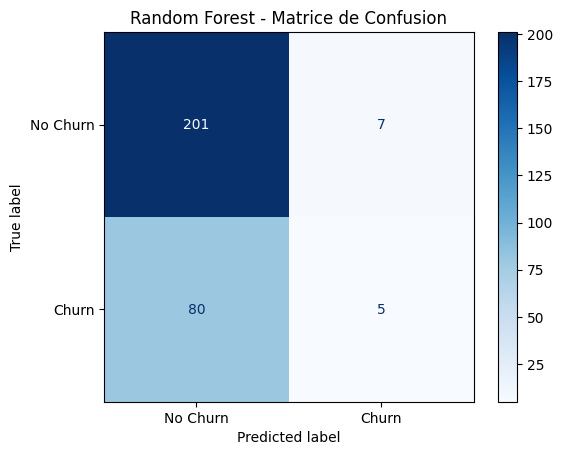


--- Entraînement et Évaluation du modèle : SVM (RBF Kernel) ---
Accuracy : 0.7099
Rapport de Classification :
               precision    recall  f1-score   support

    No Churn       0.71      0.99      0.83       208
       Churn       0.50      0.04      0.07        85

    accuracy                           0.71       293
   macro avg       0.61      0.51      0.45       293
weighted avg       0.65      0.71      0.61       293



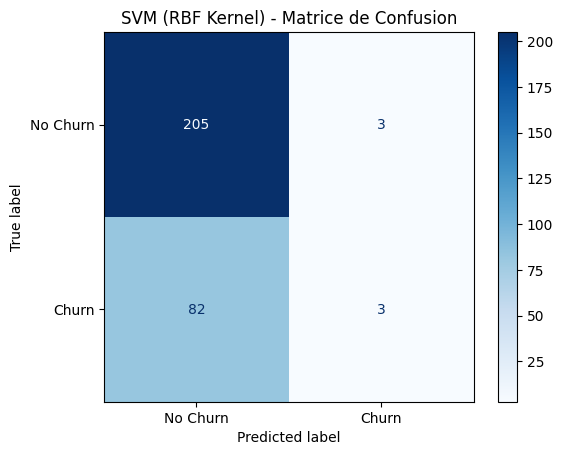


--- Entraînement et Évaluation du modèle : Decision Tree ---
Accuracy : 0.6519
Rapport de Classification :
               precision    recall  f1-score   support

    No Churn       0.76      0.75      0.75       208
       Churn       0.40      0.42      0.41        85

    accuracy                           0.65       293
   macro avg       0.58      0.58      0.58       293
weighted avg       0.66      0.65      0.65       293



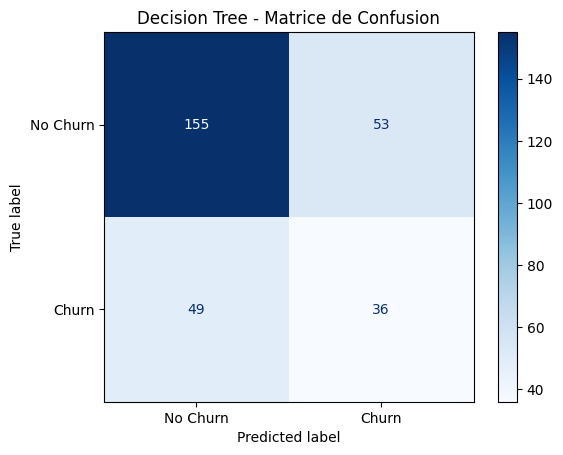


--- Entraînement et Évaluation du modèle : Naive Bayes ---
Accuracy : 0.5119
Rapport de Classification :
               precision    recall  f1-score   support

    No Churn       0.71      0.53      0.61       208
       Churn       0.29      0.46      0.35        85

    accuracy                           0.51       293
   macro avg       0.50      0.50      0.48       293
weighted avg       0.59      0.51      0.53       293



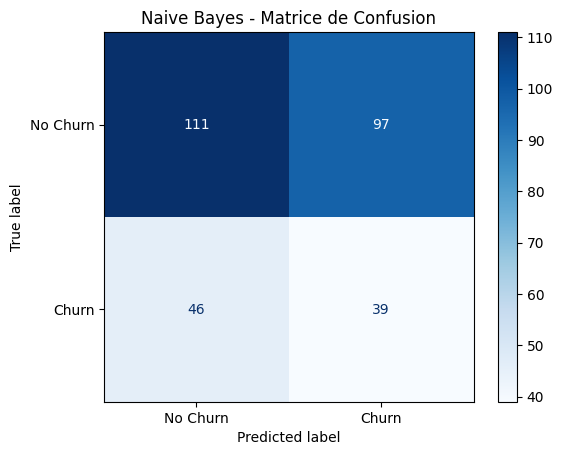


--- Entraînement et Évaluation du modèle : KNN ---
Accuracy : 0.6553
Rapport de Classification :
               precision    recall  f1-score   support

    No Churn       0.73      0.83      0.77       208
       Churn       0.36      0.24      0.28        85

    accuracy                           0.66       293
   macro avg       0.54      0.53      0.53       293
weighted avg       0.62      0.66      0.63       293



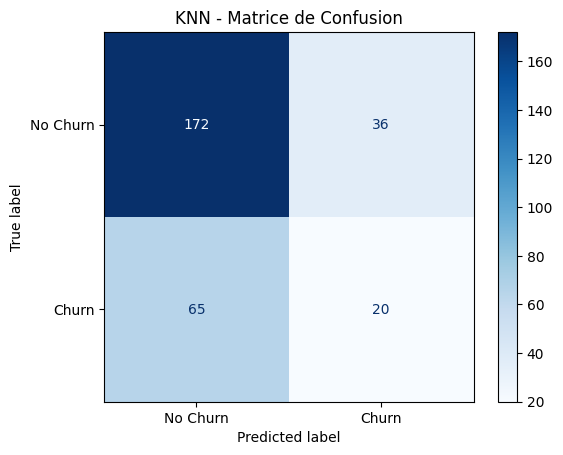

In [24]:
# Définir les modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

results = {}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"\n--- Entraînement et Évaluation du modèle : {name} ---")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, target_names=['No Churn', 'Churn'])
    cm = confusion_matrix(y_test, preds)
    
    results[name] = {'accuracy': accuracy, 'report': report, 'confusion_matrix': cm}
    
    print(f"Accuracy : {accuracy:.4f}")
    print("Rapport de Classification :\n", report)
    
    # Matrice de Confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Matrice de Confusion")
    plt.show()

## 7. Comparaison des Modèles et Conclusion

In [26]:
print("Tableau Récapitulatif des Précisions des Modèles :\n")
for name, metrics in results.items():
    print(f"{name}: {metrics['accuracy']:.4f}")

best_model_name = max(results, key=lambda name: results[name]['accuracy'])
print(f"\nLe meilleur modèle basé sur l'accuracy est : {best_model_name} avec une accuracy de {results[best_model_name]['accuracy']:.4f}")

Tableau Récapitulatif des Précisions des Modèles :

Logistic Regression: 0.6655
Random Forest: 0.7031
SVM (RBF Kernel): 0.7099
Decision Tree: 0.6519
Naive Bayes: 0.5119
KNN: 0.6553

Le meilleur modèle basé sur l'accuracy est : SVM (RBF Kernel) avec une accuracy de 0.7099


**Conclusions de la Modélisation :**
*   La plupart des modèles ont une performance similaire en termes d'accuracy, autour de 70-71%.
*   Le Naive Bayes a une performance légèrement inférieure.
*   En regardant les rapports de classification, il est important de noter les scores de précision et de rappel pour la classe 'Churn' (1), car c'est souvent la classe minoritaire et la plus critique à prédire correctement.
*   La **Régression Logistique** et le **Random Forest** semblent offrir un bon compromis entre les différentes métriques.

**Facteurs Clés influençant le Churn (basé sur l'EDA) :**
*   **Ancienneté (Tenure) :** Les clients avec une plus faible ancienneté sont plus susceptibles de churner.
   **Revenu Total :** Les clients générant moins de revenus ont une propension plus élevée au churn.
   **Raisons de Churn :** Les tarifs élevés, les offres concurrentes et la consommation rapide des données sont des raisons majeures.
   **Plans de Souscription :** Certains plans pourraient être associés à des taux de churn plus élevés.
   **État Géographique :** Des disparités de churn peuvent exister entre les états, potentiellement liées à la qualité du réseau ou à la concurrence locale.

**Recommandations Business Potentielles :**
1.  **Programmes de Rétention pour Nouveaux Clients :** Mettre en place des offres spéciales ou un suivi client amélioré pour les clients ayant une faible ancienneté afin de les fidéliser.
2.  **Optimisation des Plans Tarifaires :** Revoir les plans de données, en particulier ceux perçus comme coûteux ou menant à une consommation rapide, pour offrir un meilleur rapport qualité-prix.
3.  **Analyse Concurrentielle Continue :** Surveiller les offres des concurrents et adapter les propositions de valeur MTN en conséquence.
4.  **Amélioration du Réseau :** Investir dans l'amélioration de la qualité du réseau dans les états où le churn est élevé et où la raison invoquée est la mauvaise qualité du réseau.
5.  **Service Client :** Adresser les problèmes de service client qui peuvent mener au churn.
6.  **Offres Personnalisées :** Utiliser les données de comportement client (comme l'utilisation des données, le revenu généré) pour proposer des offres et des plans plus personnalisés et adaptés.

**Pistes Futures :**
*   Explorer des techniques de rééquilibrage des classes (ex: SMOTE) si le déséquilibre impacte fortement la prédiction de la classe minoritaire (churners).
   Optimiser les hyperparamètres des modèles les plus performants (ex: GridSearchCV, RandomizedSearchCV).
   Analyser plus en profondeur l'impact des variables de `Date of Purchase` en créant des features temporelles.
   Développer un modèle pour prédire les *raisons* du churn afin de cibler les actions de rétention de manière encore plus précise.